Para melhor experiência de visualização desse notebook é recomendado o uso das extensões "Coldefolding" e "Collapsible Headings", podem ser facilmente encontradas pela extensão  ["Nbextensions"](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) 

# Tratando dados iniciais
Primeiro faremos a limpeza inicial dos dados, bem como adicionaremos alguns dados de outras fontes para complementar.

In [2]:
options(warn=-1)
library(dplyr)
library(lubridate)
library(readxl)

In [3]:
load("dataset/vra-wu.RData")

In [4]:
#Mudar tipos de dados POSIX
vra_wu$depart_expect = as.POSIXct(vra_wu$depart_expect)
vra_wu$depart = as.POSIXct(vra_wu$depart)
vra_wu$arrival_expect = as.POSIXct(vra_wu$arrival_expect)
vra_wu$arrival = as.POSIXct(vra_wu$arrival)

In [5]:
# Filtrar apenas o ano desejado
vrawu17 = vra_wu %>% filter(year(depart_expect) == 2017 | year(arrival_expect)==2017)

#Remover o dataframe original da memória
rm(vra_wu)

In [6]:
#Alterar os nomes das colunas já existentes
colnames(vrawu17)[colnames(vrawu17)=="destiny"] = "icao_destino"
colnames(vrawu17)[colnames(vrawu17)=="origin"] = "icao_origem"
colnames(vrawu17)[colnames(vrawu17)=="airline"] = "icao_empresa"
colnames(vrawu17)[colnames(vrawu17)=="flight"] = "voo"
#colnames(vrawu17)[colnames(vrawu17)=="autho_code"] = "new_name"     #n
colnames(vrawu17)[colnames(vrawu17)=="line_type"] = "codigo_tipo_linha"        
colnames(vrawu17)[colnames(vrawu17)=="depart_expect"] = "partida_prevista"
colnames(vrawu17)[colnames(vrawu17)=="depart"] = "partida_real"
colnames(vrawu17)[colnames(vrawu17)=="arrival_expect"] = "chegada_prevista"
colnames(vrawu17)[colnames(vrawu17)=="arrival"] = "chegada_real"
colnames(vrawu17)[colnames(vrawu17)=="status"] = "situacao_voo"
colnames(vrawu17)[colnames(vrawu17)=="observation"] = "cod_justificativa"
colnames(vrawu17)[colnames(vrawu17)=="departure_delay"] = "atraso_partida"
colnames(vrawu17)[colnames(vrawu17)=="arrival_delay"] = "atraso_chegada"
#colnames(vrawu17)[colnames(vrawu17)=="duration_expect"] = "duracao_prevista"   #não existia no nosso vrawu17
#colnames(vrawu17)[colnames(vrawu17)=="duration"] = "duracao_real"    #não existia no nosso vrawu17
#colnames(vrawu17)[colnames(vrawu17)=="duration_delta"] = "duracao_delta"   #não existia no nosso vrawu17
colnames(vrawu17)[colnames(vrawu17)=="origin.state"] = "origem_uf"
colnames(vrawu17)[colnames(vrawu17)=="destiny.state"] = "destino_uf"
colnames(vrawu17)[colnames(vrawu17)=="depart_temperature"] = "origem_temperatura"
colnames(vrawu17)[colnames(vrawu17)=="depart_dew_point"] = "origem_dew_point"
colnames(vrawu17)[colnames(vrawu17)=="depart_humidity"] = "origem_umidade"
colnames(vrawu17)[colnames(vrawu17)=="depart_pressure"] = "origem_pressao"
colnames(vrawu17)[colnames(vrawu17)=="depart_visibility"] = "origem_visibilidade"
colnames(vrawu17)[colnames(vrawu17)=="depart_events"] = "origem_eventos"
colnames(vrawu17)[colnames(vrawu17)=="depart_conditions"] = "origem_condicoes"
colnames(vrawu17)[colnames(vrawu17)=="arrival_temperature"] = "destino_temperatura"
colnames(vrawu17)[colnames(vrawu17)=="arrival_dew_point"] = "destino_dew_point"
colnames(vrawu17)[colnames(vrawu17)=="arrival_humidity"] = "destino_umidade"
colnames(vrawu17)[colnames(vrawu17)=="arrival_pressure"] = "destino_pressao"
colnames(vrawu17)[colnames(vrawu17)=="arrival_visibility"] = "destino_visibilidade"
colnames(vrawu17)[colnames(vrawu17)=="arrival_events"] = "destino_eventos"
colnames(vrawu17)[colnames(vrawu17)=="arrival_conditions"] = "destino_condicoes"

In [7]:
# id de tempo
vrawu17$timekey_partida <- paste(substr(vrawu17$partida_prevista,1,4), substr(vrawu17$partida_prevista,6,7), substr(vrawu17$partida_prevista,9,10), substr(vrawu17$partida_prevista,12,13), "00", sep = "")
vrawu17$timekey_chegada <- paste(substr(vrawu17$chegada_prevista,1,4), substr(vrawu17$chegada_prevista,6,7), substr(vrawu17$chegada_prevista,9,10), substr(vrawu17$chegada_prevista,12,13), "00", sep = "")
# datas
vrawu17$origem_data = as.Date(vrawu17$partida_prevista)
vrawu17$origem_hora = as.numeric(substr(vrawu17$partida_prevista, 12,13))
vrawu17$destno_data = as.Date(vrawu17$chegada_prevista)
vrawu17$destino_hora = as.numeric(substr(vrawu17$chegada_prevista, 12,13))


In [8]:
# Carregar dimensões - aerodromos
# fonte: ANAC http://www.anac.gov.br/assuntos/dados-e-estatisticas
aerodromos <- read_excel("dataset/aeroportos/Glossario_de_Aerodromo.xls", skip = 3, col_names = TRUE )
origens <- aerodromos
colnames(origens) <- c("icao_origem", "origem_descricao", "origem_cidade","origem_uf", "origem_pais", "origem_continente")
vrawu17$icao_origem = as.character(vrawu17$icao_origem)
vrawu17 <- merge(x=vrawu17, y=origens, all.x = TRUE, by.x='icao_origem', by.y='icao_origem')
colnames(vrawu17)[colnames(vrawu17)=="origem_uf.y"] = "origem_uf"
vrawu17$origem_uf.x = NULL
destinos <- aerodromos
colnames(destinos) <- c("icao_destino", "destino_descricao", "destino_cidade","destino_uf", "destino_pais", "destino_continente")
vrawu17 <- merge(x=vrawu17, y=destinos, all.x = TRUE, by.x='icao_destino', by.y='icao_destino')
colnames(vrawu17)[colnames(vrawu17)=="destino_uf.y"] = "destino_uf"
vrawu17$destino_uf.x = NULL
rm(origens, destinos, aerodromos)

In [9]:
# Carrega dimensoes - DI
vrawu17$codigo_di = as.character(vrawu17$autho_code)
di <- read_excel("dataset/aeroportos/Glossario_de_Digito_Identificador.xls", skip = 3, 
    col_names = TRUE)
colnames(di) <- c("codigo_di", "descricao_codigo_di")
vrawu17 <- merge(x = vrawu17, y = di, all.x = TRUE)
rm(di)
vrawu17$autho_code = NULL

In [10]:
# Carrega dimensões - empresa
empresas <- read_excel("dataset/aeroportos/glossario_de_empresas_aereas.xls", skip = 3, col_names = TRUE )
colnames(empresas) <- c("icao_empresa", "empresa", "x1", "nacionalidade")
empresas$x1 <- NULL
vrawu17 <- merge(x=vrawu17, y=empresas, all.x = TRUE)
rm(empresas)

In [11]:
# Carrega dimensões - justificativas
#Obs: o arquivo original de justificativas continha caracteres estranhos que impediam sua leitura
#     foi necessário editar o xls antes de carregar

justificativas <- read_excel("dataset/aeroportos/Glossario_de_Justificativas.xls", skip = 3, col_names = TRUE )
colnames(justificativas) <- c("cod_justificativa", "descricao_justificativa")
vrawu17 <- merge(x=vrawu17, y=justificativas, all.x = TRUE)
rm(justificativas)

# Carrega dimensões - tipo de linha
tipo_linha <- read_excel("dataset/aeroportos/Glossario_de_Tipo_de_Linha.xls", skip = 3, col_names = TRUE )
colnames(tipo_linha) <- c("codigo_tipo_linha", "tipo_linha")
vrawu17 <- merge(x=vrawu17, y=tipo_linha, all.x = TRUE)
rm(tipo_linha)

## Filtrando dados
Focaremos as análises nas linhas brasileiras

In [12]:
vrawu17 <- vrawu17 %>% filter(origem_pais=="BRASIL"& destino_pais=="BRASIL")

# Análise Exploratória

## Análises preliminares

In [100]:
#carregando bibliotecas
library(tools)
library(data.table)
library(gridExtra)
source("https://raw.githubusercontent.com/boxuancui/DataExplorer/master/R/helper.r")
source("https://raw.githubusercontent.com/boxuancui/DataExplorer/master/R/split_columns.r")
source("https://raw.githubusercontent.com/boxuancui/DataExplorer/master/R/plot_bar.r")
source("https://raw.githubusercontent.com/boxuancui/DataExplorer/master/R/plot_missing.r")
source("https://raw.githubusercontent.com/boxuancui/DataExplorer/master/R/plot_bar.r")
source("https://raw.githubusercontent.com/boxuancui/DataExplorer/master/R/plot_histogram.r")
library(ggplot2)
library(scales)
library(tidyr)

In [48]:
head(vrawu17)

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,voo,partida_prevista,partida_real,chegada_prevista,...,destino_descricao,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha
C,,GLO,0,SBCF,SBSV,1833,2017-12-07 22:35:00,2017-12-07 22:35:00,2017-12-08 00:15:00,...,TANCREDO NEVES,CONFINS,MG,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,Cargueiro
C,,GLO,0,SBGL,SBKP,1993,2017-01-09 20:05:00,2017-01-09 20:05:00,2017-01-09 21:10:00,...,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALEÃO ANTONIO CARLOS JOBIM,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,Cargueiro
C,,GLO,0,SBGO,SBSP,1428,2017-09-10 10:25:00,2017-09-10 10:25:00,2017-09-10 12:00:00,...,SANTA GENOVEVA,GOIANIA,GO,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,Cargueiro
C,MX,LTG,0,SBEG,SBBE,6578,2017-02-11 19:55:00,2017-02-11 21:24:00,2017-02-11 21:55:00,...,EDUARDO GOMES,MANAUS,AM,BRASIL,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,ATRASOS NÃO ESPECÍFICOS OUTROS,Cargueiro
C,,GLO,0,SBLO,SBSP,1164,2017-05-23 11:50:00,2017-05-23 11:50:00,2017-05-23 12:55:00,...,GOVERNADOR JOSÉ RICHA,LONDRINA,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,Cargueiro
C,,GLO,0,SBGL,SBNF,2151,2017-12-09 06:15:00,2017-12-09 06:15:00,2017-12-09 07:40:00,...,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALEÃO ANTONIO CARLOS JOBIM,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,Cargueiro


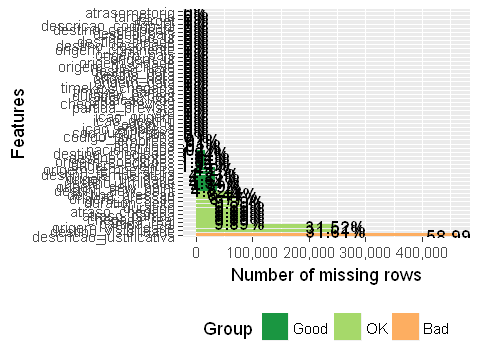

In [99]:
plot_missing(vrawu17)

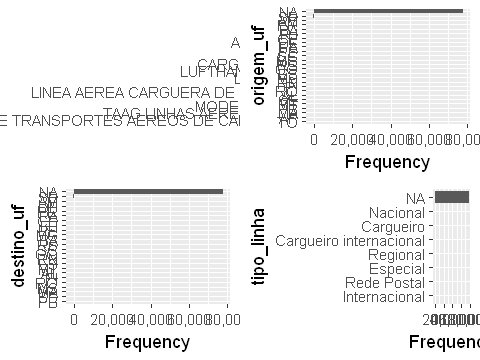

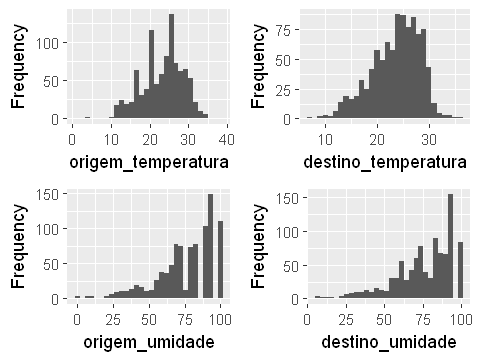

In [103]:
#Tratando dados
fl17 <- vrawu17
'%!in%' <- function(x,y)!('%in%'(x,y))

#Filtrando atrasos com mais de 15 min (partida e chegada)#Filtra 
fl17 <- fl17[fl17$atraso_partida > 15 & fl17$atraso_chegada > 15 & fl17$atraso_partida > 240 & fl17$atraso_chegada > 240,]

#Agregando para "outros"
fl17[which(fl17$icao_empresa %!in% c(names(sort(table(fl17$icao_empresa), decreasing=T)[1:15]))),]$icao_empresa <- "OUTRAS"
fl17[which(fl17$icao_origem %!in% c(names(sort(table(fl17$icao_origem), decreasing=T)[1:15]))),]$icao_origem <- "OUTRAS"
fl17[which(fl17$icao_destino %!in% c(names(sort(table(fl17$icao_destino), decreasing=T)[1:15]))),]$icao_destino <- "OUTROS"
fl17[which(fl17$destino_cidade %!in% c(names(sort(table(fl17$destino_cidade), decreasing=T)[1:15]))),]$destino_cidade <- "OUTROS"
fl17[which(fl17$destino_descricao %!in% c(names(sort(table(fl17$destino_descricao), decreasing=T)[1:15]))),]$destino_descricao <- "OUTROS"
fl17[which(fl17$empresa %!in% c(names(sort(table(fl17$empresa), decreasing=T)[1:15]))),]$empresa <- "OUTROS"
fl17[which(fl17$origem_descricao %!in% c(names(sort(table(fl17$origem_descricao), decreasing=T)[1:15]))),]$origem_descricao <- "OUTROS"
fl17[which(fl17$origem_cidade %!in% c(names(sort(table(fl17$origem_cidade), decreasing=T)[1:15]))),]$origem_cidade <- "OUTROS"


#Convertendo datas
fl17$timekey_partida <- strptime(fl17$timekey_partida, '%Y%m%d%H%M')
fl17$timekey_chegada <- strptime(fl17$timekey_chegada, '%Y%m%d%H%M')
#fl17$origem_data <- as.Date(fl17$origem_data)
#fl17$destino_data <- as.Date(fl17$destino_data)

plot_bar(fl17[c("empresa","origem_uf","destino_uf","tipo_linha")])
plot_histogram(fl17[c("origem_temperatura", "destino_temperatura","origem_umidade", "destino_umidade")])

rm(fl17)

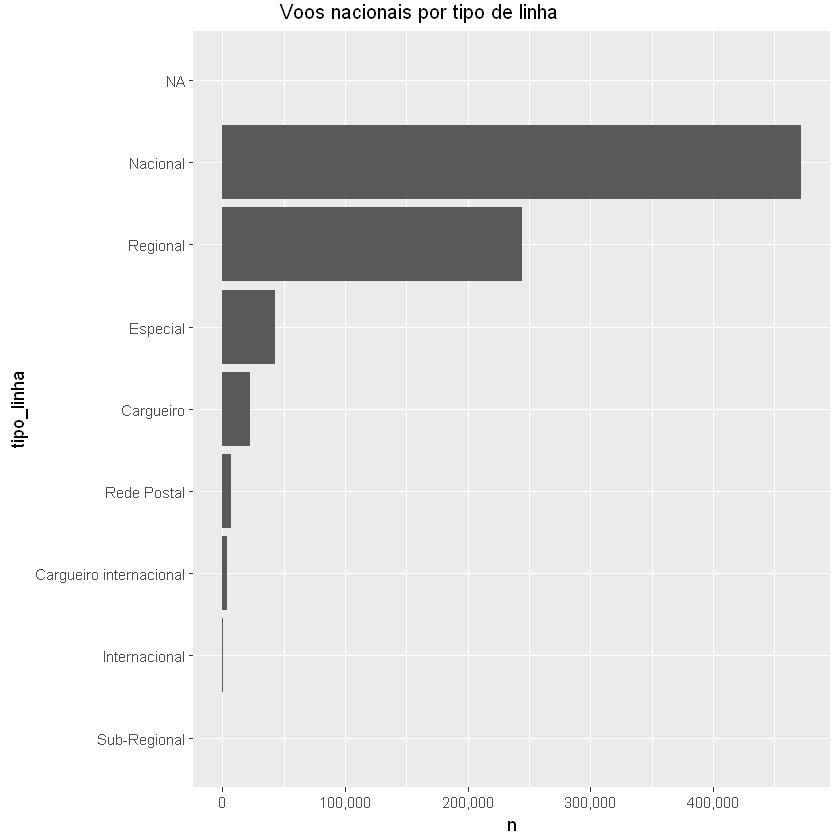

In [47]:
tipo_linha <- vrawu17 %>% count(tipo_linha)
plot_bar(tipo_linha, with = "n", title = "Voos nacionais por tipo de linha")

Obs.:
- Alguns voos nacionais estão classificados como internacionais (aparentemente, pernas de voos internacionais).
- Preferi analisar voos de todos os tipos

São muitos aeródromos de pouca expressão. Vamos considerar apenas os que têm pelo menos 4 voos diários.

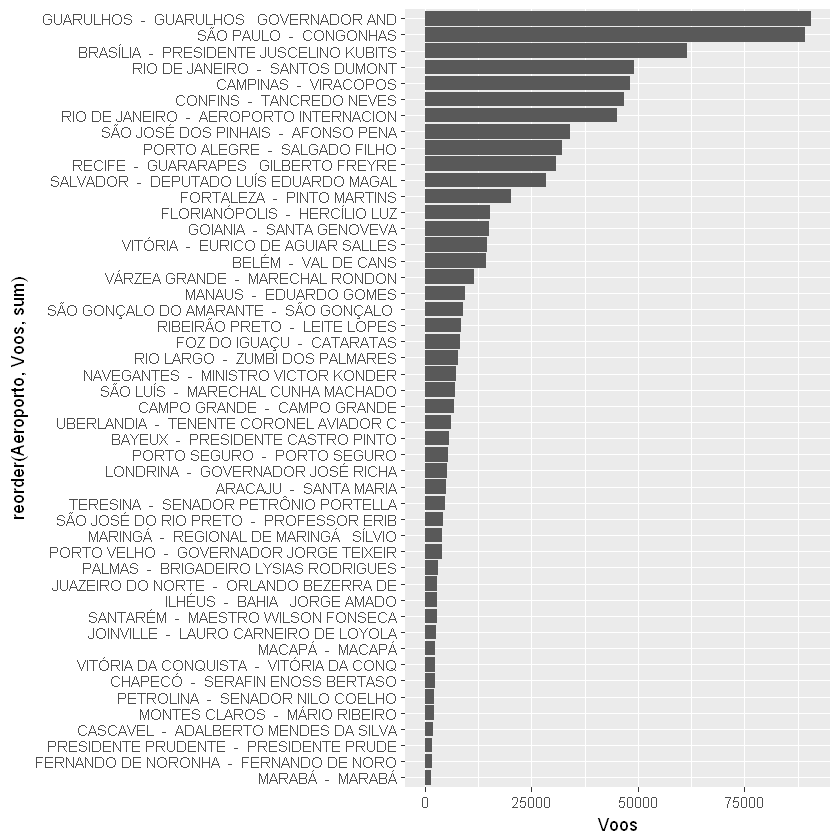

In [50]:
#
aerop = count(vrawu17, icao_origem)
aerop = filter(aerop, n > 1460)

# Prepara rótulos mais apropriados para o gráfico
temp = select(vrawu17, icao_origem, origem_cidade, origem_descricao)
temp = unique(temp)
temp$aerop = substr(paste(temp$origem_cidade, " - ", temp$origem_descricao), 1, 40)

# Troca o código pelo nome 
aerop = merge(x = aerop, y = temp, all.x = TRUE)
aerop = select(aerop, icao_origem, aerop, n)
colnames(aerop) = c("Código", "Aeroporto", "Voos")

# Exibe o gráfico
ggplot(aerop, aes(x=reorder(Aeroporto,Voos,sum ) , y=Voos)) + geom_bar(show.legend = TRUE, stat = "identity") + coord_flip()
# (não foi possivel usar o Data Explorer pois há mais de 50 categorias na variável)
rm(temp)

##  Analisando os atrasos de partida

Para esta análise utilizaremos atrasos, de voos realizados, em um intervalo de 15m até 4h, pois são os atrasos mais comuns, os maiores que 4 horas apresentão consequências mais severas as empresas de aviação, de acordo com a ANAC as empresas tem que tomar as seguintes providências:

> - **A partir de 1 hora**: comunicação (internet, telefonemas, etc).
>- **A partir de 2 horas**: alimentação (voucher, lanche, bebidas, etc).
>- **A partir de 4 horas**: acomodação ou hospedagem (se for o caso) e transporte do aeroporto ao local de acomodação. Se você estiver no local de seu domicílio, a empresa poderá oferecer apenas o transporte para sua residência e desta para o aeroporto.


> **O passageiro pode solicitar reembolso quando ocorrer:**
> - a) Atraso do voo por mais de quatro horas;

Consideraremos atraso como sendo maior que 15 minutos, internacionalmente é o que praticado

Fonte: http://www.anac.gov.br/assuntos/passageiros/atrasos-cancelamento-e-pretericao-de-embarque

In [88]:
# Tratamento dos dados
atrasos = vrawu17[vrawu17$atraso_partida >15 & 
                  vrawu17$atraso_partida <240 & 
                  vrawu17$situacao_voo=="REALIZADO" &
                  !is.na(vrawu17$icao_origem),]

#carregando dados dos aeroportos
library(data.table)
library(dplyr) #select %>%
airport = fread('dataset/aeroportos/airports_simplified.csv')

#### Top 5 aeroportos em contagem de atrasos de partida no brasil

In [70]:
# Ordenando por atraso
library(dplyr) #%>%
vw_g = atrasos[c("icao_origem")]
vw_g = vw_g %>% group_by(icao_origem) %>% summarize(Count = n())
vw_g = vw_g[rowSums(is.na(vw_g))==0,] 
names(vw_g)[names(vw_g) == 'Count'] = 'qnt_atrasados'

vw_t = vrawu17[c("icao_origem")]
vw_t = vw_t %>% group_by(icao_origem) %>% summarize(Count = n())
vw_t = vw_t[rowSums(is.na(vw_t))==0,] 
names(vw_t)[names(vw_t) == 'Count'] = 'qnt_voos'

vw = merge( vw_g, vw_t, by.x = "icao_origem", by.y = "icao_origem")
vw$relacao_atrasado = vw_g$qnt_atrasados/vw_t$qnt_voos
vw = merge( vw, airport[,c("ICAO","name")], by.x = "icao_origem", by.y = "ICAO")

head(vw[order(-vw$qnt_voos),])
rm(vw_g, vw_t, vw)

,icao_origem,qnt_atrasados,qnt_voos,relacao_atrasado,name
18,SBGR,16765,90519,0.1852097,Guarulhos - Governador AndrÃ© Franco Montoro International Airport
43,SBSP,13445,89210,0.1507118,Congonhas Airport
3,SBBR,7541,60733,0.1241664,Presidente Juscelino Kubistschek International Airport
38,SBRJ,5125,49176,0.1042175,Santos Dumont Airport
23,SBKP,5142,48061,0.1069890,Viracopos International Airport
5,SBCF,4835,45566,0.1061098,Tancredo Neves International Airport


##### Atrasos no aeroporto de guarulhos

Era de se esperar que o aeroporto de guarulhos 'SBGR' tenha a maior quantidades de atrasos visto que é o maior também em quantidade de voos. Iremos dar aqui um destaque maior para este em específico.

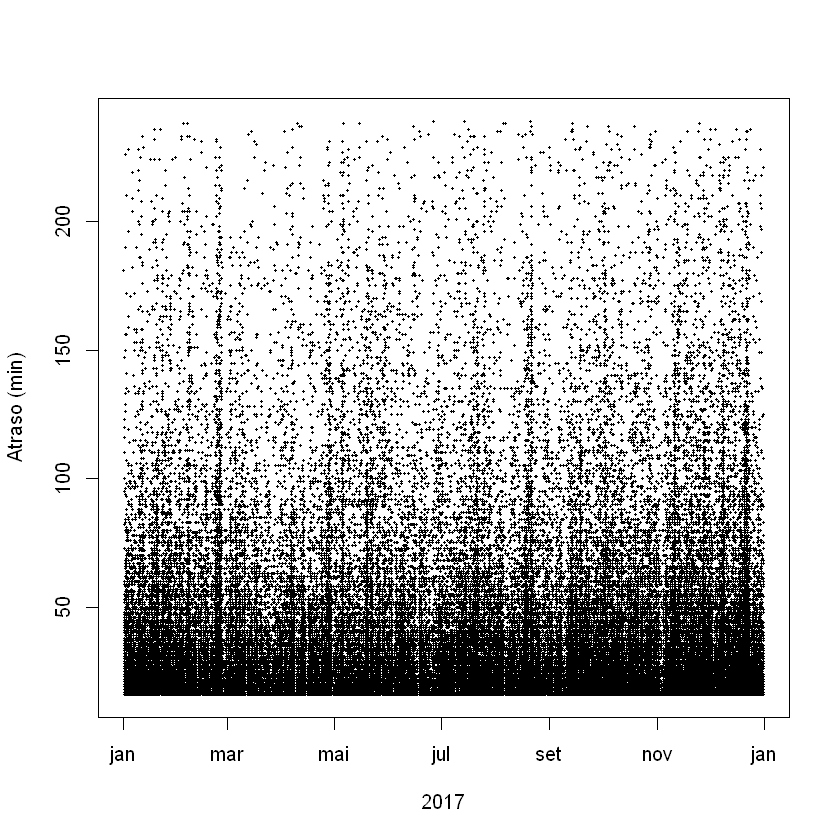

In [71]:
# Tratamento dos dados
x = atrasos$partida_real
y = atrasos$atraso_partida
plot(x,y,pch=16 , cex=0.3, ylab='Atraso (min)', xlab='2017')

Podemos notar neste gráfico que existe uma concentração maior no período de férias escolares, entre dezembro e fevereiro. Também é interessante notar algumas 'linhas' em datas específicas, isso pode ser explciado com algum feríado ou possívelmente algum problema que tenha ocorrido no aeroporto. Ex:

 - Final de ferereiro - onde acontece o carnaval (dia 28), 
 - Final de abril que pode ser explicado pelo dia do trabalhador em primeiro de maio (segunda feira)

#### Histograma de atrasos de partida

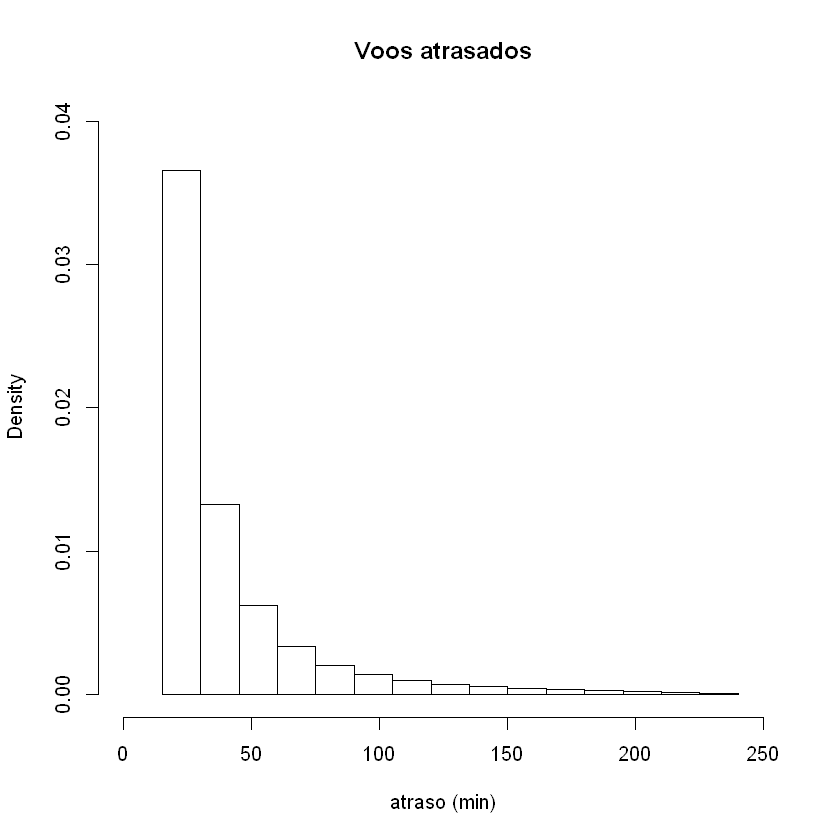

In [72]:
# Tratamento dos dados
hist(as.numeric(atrasos$atraso_partida)
     ,breaks=seq(15,240,15)
     ,ylim=c(0,0.04)
     ,xlim=c(0,250)
     ,xlab="atraso (min)"
     ,main="Voos atrasados"
     ,freq=FALSE
     )

#### Histograma de horas mais comuns de voos com atraso

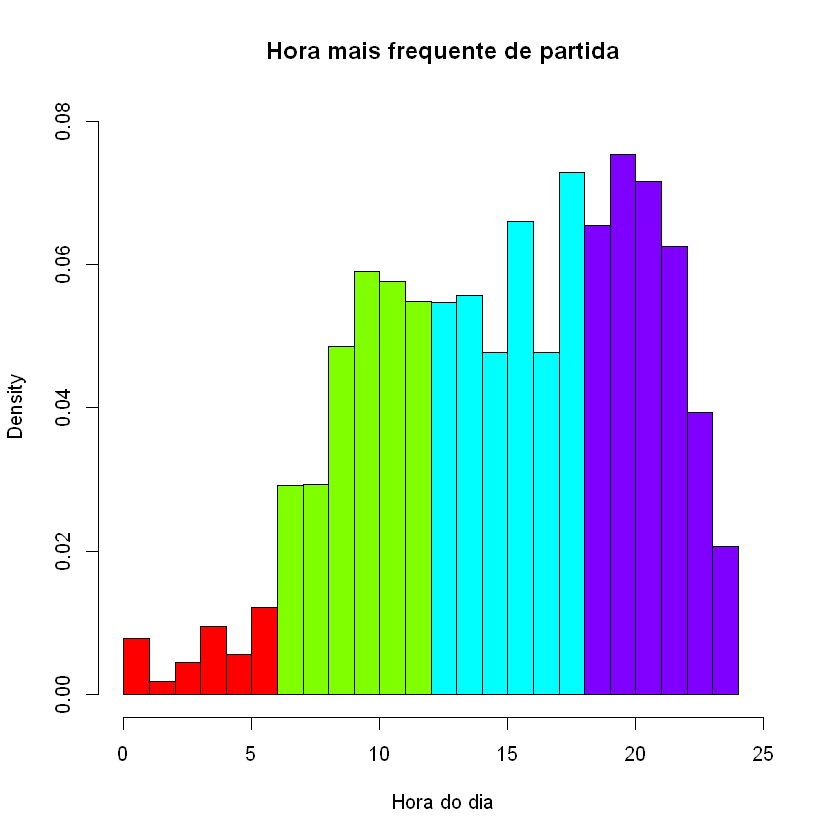

In [82]:
# Tratamento dos dados
col = rep(rainbow(4), each=6)
deh = as.POSIXlt(atrasos$partida_prevista)
h=hist(deh$hour+deh$min/60
     ,breaks=seq(0, 24, 1)
     ,xlim=c(0,25)
     ,xlab="Hora do dia"
     ,ylim=c(0,0.08)
     ,main="Hora mais frequente de partida"
     ,freq=FALSE
     ,col = col
     )
rm(deh)

#### Horas do dia com maior atraso

Para essa análise foi usado os dados inclusive que tiveram atraso, apenas foi retirado os voos adiantados (atraso negativo), pois essa análise tem como objetivo encontrar quais horários são mais propensos a atraso, para entender qual horário deve ser evitado pelo passageiro na hora de comprar uma passagem.

A fim de evitar atrasos tentamos entender melhor qual hora do dia os voos costumam atrasar mais, para isso pegamos os horários de partida previsto e verificamos em média quanto tempo voos nessa hora costumam atrasar

Este grráfico é complementar ao anterior, podemos perceber pelo anterior que existe uma maior concentração de atrasos no voos após as 6 horas da manhã, porém pelo próximo gráfico vemos que apesar da quantidade elevada de atrasos os atrasos em sí são pequenos, diferente do periodo da madrugada, que tem poucos atrasos porém com grandes atrasos.

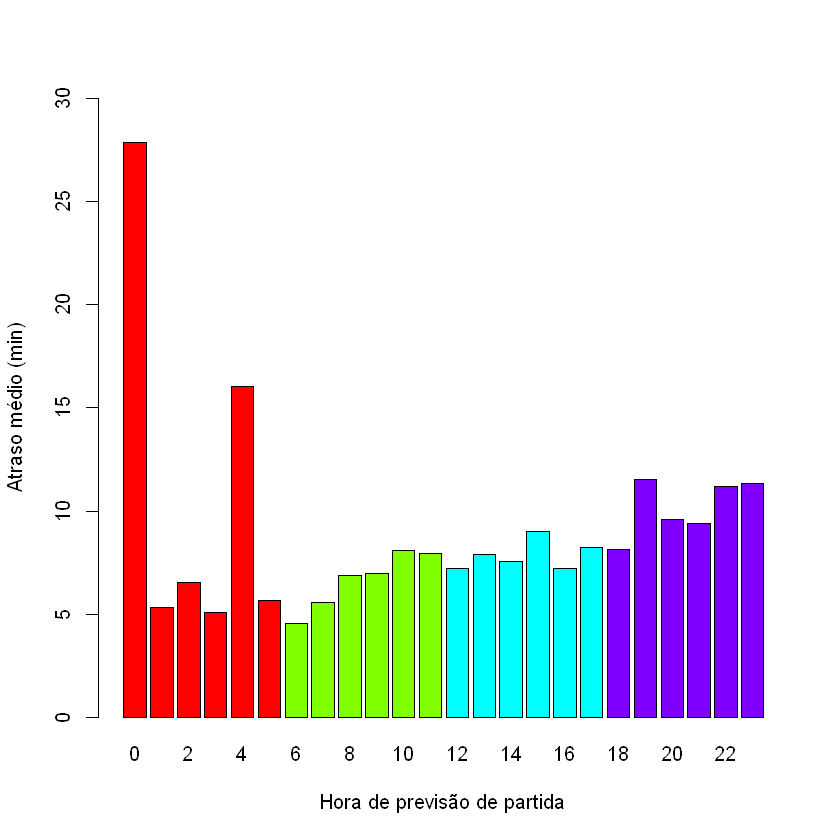

In [84]:
# Tratamento dos dados
library(dplyr) #%>%
d_h = vrawu17[,c('partida_prevista','atraso_partida')]
d_h = d_h[rowSums(is.na(d_h))==0,]
d_h = d_h[d_h$atraso_partida>=0,]

d_h$por_hora_tempo_partida = as.integer(format(d_h$partida_prevista, "%H"))
d_h = d_h %>% group_by(por_hora_tempo_partida) %>% summarize(avg = mean(atraso_partida))

barplot(as.numeric(d_h$avg),names.arg=seq(0,23,1), ylim=c(0,30), ylab='Atraso médio (min)',xlab = 'Hora de previsão de partida',col = col)
rm(d_h)

#### Dia da semana com maior atraso

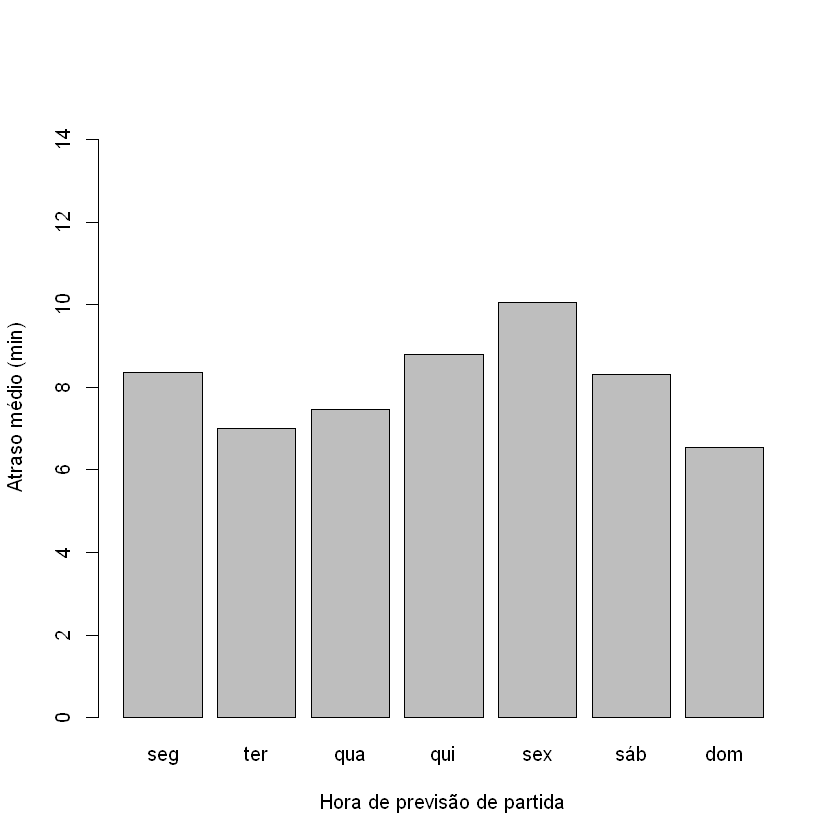

In [87]:
# Tratamento dos dados
library(dplyr) #%>%
d_h = vrawu17[,c('partida_prevista','atraso_partida')]
d_h = d_h[rowSums(is.na(d_h))==0,]
d_h = d_h[d_h$atraso_partida>=0,]
d_h$partida_prevista= as.POSIXct(d_h$partida_prevista)

d_h$por_diaSem_tempo_partida = format(d_h$partida_prevista, "%a")
d_h = d_h %>% group_by(por_diaSem_tempo_partida) %>% summarize(avg = mean(atraso_partida))

a=c('seg','ter','qua','qui','sex','sáb','dom')
d_h=d_h[order(match(d_h$por_diaSem_tempo_partida, a)),] #ordenando por dia de semana

barplot(as.numeric(d_h$avg), 
    names.arg=a, 
    ylim=c(0,15), 
    ylab='Atraso médio (min)',
    xlab = 'Hora de previsão de partida')

rm(d_h)

## Analisando condições meteorológicas

Quais aeroportos atrasam/cancelam mais voos devido a condções meteorológicas?

In [63]:
# Filtrar o dataset
vrawu17 = vrawu17 %>% 
     filter(icao_origem %in% aerop$`Código`) %>%
     filter(icao_destino %in% aerop$`Código`)

# apenas os registros de cancelamento/atraso relacionados ao clima
# normativa IAC-1504
# http://www.anac.gov.br/assuntos/legislacao/legislacao-1/iac-e-is/iac/iac-1504/@@display-file/arquivo_norma/IAC1504.pdf
justificativas = select(vrawu17, cod_justificativa, descricao_justificativa)
justificativas = unique(justificativas)
justificativas = na.exclude(justificativas)
justmeteorologicas = filter(justificativas, cod_justificativa %in% c("WO", "WI", "WR", "WS", "WT", "WA", "XO", "XS", "XT", "AM", "RM"))

# Cria coluna target, que identifica os atrasos ou cancelamentos provocados por eventos meteorológicos
target = ifelse(vrawu17$cod_justificativa %in% justmeteorologicas$cod_justificativa, 1, 0)
vrawu17 = cbind(vrawu17, target)

# Cria coluna target_ori, que identifica os atrasos ou cancelamentos provocados por eventos meteorológicos no aeroporto de origem
justMeteorOrigem = filter(justificativas, cod_justificativa %in% c("WO", "XO"))
target_ori = ifelse(vrawu17$cod_justificativa %in% justMeteorOrigem$cod_justificativa, 1, 0)
vrawu17 = cbind(vrawu17, target_ori)

# Ordena os aeroportos por percentual de atrasos
ranking_aerop_atrasos  = 
  vrawu17 %>% 
    group_by(icao_origem) %>% 
    count(target_ori) %>% 
    spread(target_ori, n) %>% 
    mutate(perc = `1`/`0`)

# Recupera os nomes dos aeroportos e classifica
ranking_aerop_atrasos = merge(x=ranking_aerop_atrasos, y = aerop, by.x = "icao_origem", by.y = "Código", all.x = TRUE)
ranking_aerop_atrasos =ranking_aerop_atrasos %>% select(icao_origem, Aeroporto, `0`, `1`, Voos, perc) %>% arrange(desc(perc))

In [64]:
# Top 10 com mais atrasos/cancelamentos
ranking_aerop_atrasos[1:10,]

icao_origem,Aeroporto,0,1,Voos,perc
SBCA,CASCAVEL - ADALBERTO MENDES DA SILVA,1902,86,1988,0.04521556
SBCH,CHAPECÓ - SERAFIN ENOSS BERTASO,2309,76,2385,0.03291468
SBQV,VITÓRIA DA CONQUISTA - VITÓRIA DA CONQ,2326,72,2398,0.03095443
SBJV,JOINVILLE - LAURO CARNEIRO DE LOYOLA,2697,47,2744,0.01742677
SBIL,ILHÉUS - BAHIA JORGE AMADO,2837,48,2885,0.01691928
SBMG,MARINGÁ - REGIONAL DE MARINGÁ SÍLVIO,4062,67,4129,0.01649434
SBLO,LONDRINA - GOVERNADOR JOSÉ RICHA,5075,72,5147,0.01418719
SBFN,FERNANDO DE NORONHA - FERNANDO DE NORO,1623,22,1645,0.01355514
SBMQ,MACAPÁ - MACAPÁ,2512,30,2542,0.01194268
SBRJ,RIO DE JANEIRO - SANTOS DUMONT,48607,569,49176,0.01170613


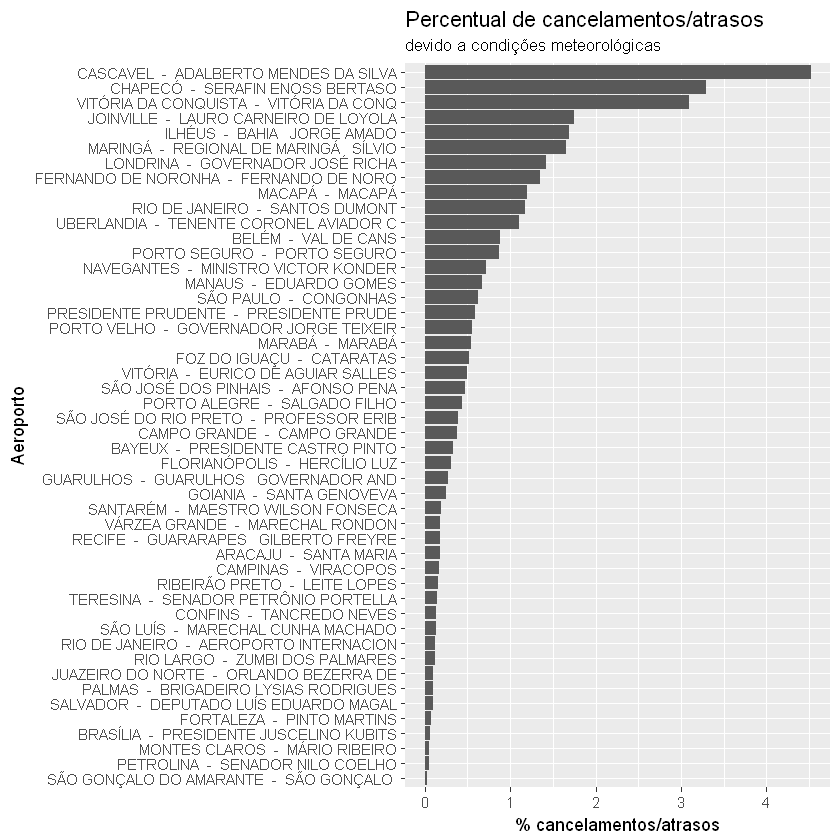

In [65]:
# Percentual de cancelamentos/atrasos
g = ggplot(ranking_aerop_atrasos, aes(x=reorder(Aeroporto,perc,sum ) , y=perc*100)) + 
    geom_bar(show.legend = TRUE, stat = "identity") +
    coord_flip()
g = g + ggtitle("Percentual de cancelamentos/atrasos", subtitle="devido a condições meteorológicas") +
        xlab("Aeroporto") +
        ylab("% cancelamentos/atrasos")
plot(g)

#### Correlação de condições climáticas

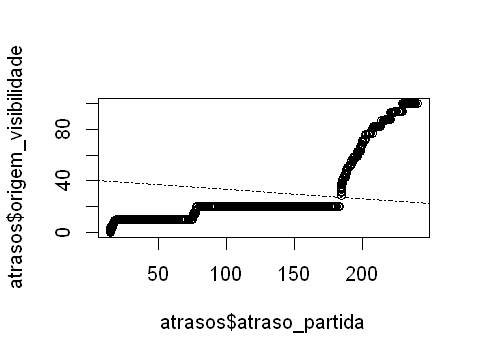

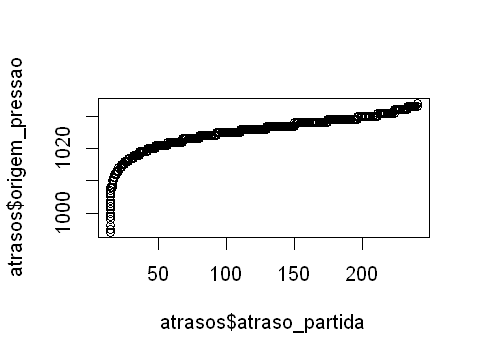

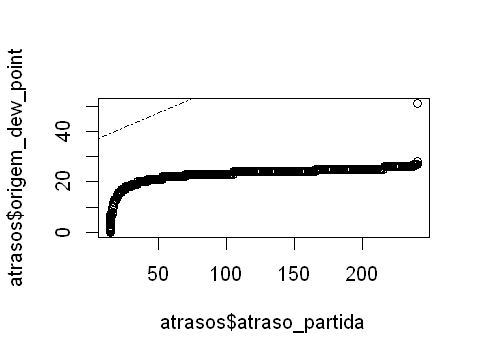

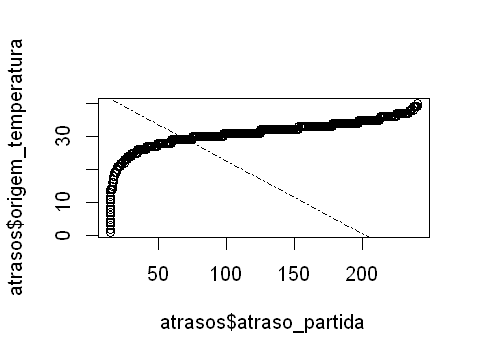

In [91]:
# Tratamento dos dados
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
library(RColorBrewer)

atrasos = vrawu17[vrawu17$atraso_partida >=15  & vrawu17$atraso_partida <= 240,]
options(repr.plot.width=4, repr.plot.height=3)
qqplot(atrasos$atraso_partida, atrasos$origem_visibilidade)
fm <- lm(atrasos$atraso_partida ~ atrasos$origem_visibilidade)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(atrasos$atraso_partida, atrasos$origem_pressao)
fm <- lm(atrasos$atraso_partida ~ atrasos$origem_pressao)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(atrasos$atraso_partida, atrasos$origem_dew_point)
fm <- lm(atrasos$atraso_partida ~ atrasos$origem_dew_point)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(atrasos$atraso_partida, atrasos$origem_temperatura)
fm <- lm(atrasos$atraso_partida ~ atrasos$origem_temperatura)
abline(coef(fm), lty=4)

#### Distribuição geográfica dos atrasos

Nesta análise verificamos onde estão posicionados no mapa brasileiro os aeroportos que mais tem atrasos ou cancelamentos devido a condições climáticas.

Fonte do mapa: https://downloads.ibge.gov.br/downloads_geociencias.htm

In [93]:
# Tratamento dos dados

library(data.table) #fread
library(dplyr) #select %>% 
ranking_mov = count(vrawu17, icao_origem) %>% arrange(desc(n))

vrawu17$atrasometorig = ifelse(vrawu17$cod_justificativa %in% c("WO", "XO"), 1, 0)
ranking_atrasos_met = (vrawu17 
    %>% filter(atrasometorig==1)
    %>% filter(substr(icao_origem,1,2)=="SB")
    %>% count(icao_origem) 
    %>% arrange(desc(n)))
atrasos = merge(x = ranking_mov, y = ranking_atrasos_met , by.x = "icao_origem", by.y = "icao_origem", all.x = TRUE) 
atrasos$proporcional = atrasos$n.y / atrasos$n.x
colnames(atrasos) = c("icao", "voos", "atrasos", "prop")
top20 = top_n(atrasos, 50, atrasos)
eventos = (vrawu17 
    %>% filter(atrasometorig==1) 
    %>% filter(icao_origem %in% top20$icao) 
    %>% select(icao_origem, partida_prevista, situacao_voo, atraso_partida) 
    %>% group_by(icao_origem) 
    %>% summarize(Count = n()))
rm(ranking_atrasos_met, ranking_mov)

airport = fread("dataset/aeroportos/airports_simplified.csv",encoding = 'UTF-8')

eventos= merge(eventos,airport, by.x="icao_origem", by.y="ICAO")

Regions defined for each Polygons


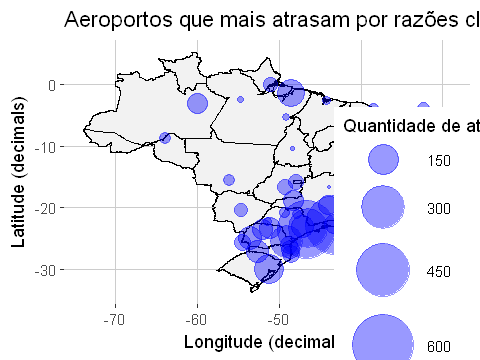

In [97]:
# mapa
library(maptools)

mapa <- borders(database ="world", regions = "Brazil", fill = "grey95", colour = "black")

brazil <- ggplot() + mapa + theme_bw() + xlab("Longitude (decimals)") + ylab("Latitude (decimals)") + 
  theme(panel.border = element_blank(), panel.grid.major = element_line(colour = "grey80"), panel.grid.minor = element_blank())

estados <- readShapePoly("dataset/br_unidades_da_federacao/BRUFE250GC_SIR.shp")
estados1 <- fortify(estados)

br_est <- brazil + geom_path(data = estados1, aes(x = long, y = lat, group = group), colour = "black")


update_geom_defaults("point", list(size = 25))
maps = (br_est 
        + geom_point(data = eventos, aes(x=longitude, y=latitude, size=Count),colour='blue', alpha = .4,)
        + scale_size_area(max_size = 17,name = "Quantidade de atraso",limits=c(0, 600), breaks=seq(150, 600, by=150))
        + theme(legend.position=c(0.9,0.2), legend.key.width = unit(0.5, "cm"))
       )

maps = maps + ggtitle('Aeroportos que mais atrasam por razões climáticas') #+ scale_size_manual(name = "Quantidade de atraso",labels = c("100", "300", "600"),values = c("blue", "red", "green"))
maps

# Propagação de atrasos

## Aplicando o CSPADE

O objetivo nesta parte do trabalho é identificar regras de propagação de atrasos entre os aeroportos. Isso posto, é utilizado um método de mineração de padrões sequenciais por meio do algoritmo CSPADE.

O arquivo com os dados necessários para executar-se o algoritmo CSPADE deve estar no seguinte formato:
**[SID] [EID] [SIZE]** onde: **[SID]** é um identificador sequencial de uma transação,
**[EID]** é um identificador do evento de uma transação e **[SIZE]** é composto pelo tamanho do conjunto de itens
de uma transação, seguido dos códigos dos itens propriamente dito.<BR><BR>
Neste trabalho, considerando-se o conjunto de dados de voos, tem-se:<BR><BR>
**[SID]** é composto pelo código ICAO do aeroporto mais a data de partida do voo;<BR>
**[EID]** é a hora cheia de partida do voo; e<BR>
**[SIZE]** é composto pelo tamanho do conjunto de números dos voos, seguido pelos números dos voos.<BR><BR>
Observando-se que somente os voos atrasados em mais de 15 minutos e menos de 240 minutos são considerados.

In [18]:
# Algumas bibliotecas
library("network")
library("plyr")
library("proto")
library("RSQLite")
library("sqldf")
library("Matrix")
library("grid")
library("arules")
library("arulesSequences")
library("arulesViz")

also installing the dependencies 'vcd', 'seriation', 'DT', 'plotly'



package 'vcd' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'DT' successfully unpacked and MD5 sums checked
package 'plotly' successfully unpacked and MD5 sums checked
package 'arulesViz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\g_pac\AppData\Local\Temp\Rtmp8YP1UT\downloaded_packages


### Filtrando os dados

##### Gerando conjunto de treinamento

In [25]:
# Transforma o formato POSIXlt em chr
# para que possa ser trabalhado em conjunto com o sqldf
vra_wu_2017 = vrawu17
vra_wu_2017$partida_prevista <- as.character(vra_wu_2017$partida_prevista)
vra_wu_2017$partida_real <- as.character(vra_wu_2017$partida_real)
vra_wu_2017$partida_prevista <- as.character(vra_wu_2017$partida_prevista)
vra_wu_2017$partida_real <- as.character(vra_wu_2017$partida_real)

# Especifica-se uma query para montar o conjunto treinamento.
query<-"select icao_destino, icao_origem, icao_empresa, voo, partida_real, chegada_real, atraso_partida, atraso_chegada,"
query<-paste(query,"origem_temperatura, origem_dew_point, origem_umidade, origem_pressao, origem_visibilidade, origem_eventos, origem_condicoes,", sep=" ")
query<-paste(query,"destino_temperatura, destino_dew_point, destino_umidade, destino_pressao, destino_visibilidade, destino_eventos, destino_condicoes", sep=" ")
query<-paste(query, "from vra_wu_2017 where situacao_voo = 'Realizado' or situacao_voo ='REALIZADO'", sep=" ")

# Carrega-se o conjunto treinamento com base na especificação da query acima descrita.
train_set<-sqldf(query)

Considera-se apenas as partidas e as chegadas nos aeroportos domésticos.

In [26]:
sub_set<-train_set[which(train_set$icao_origem=="SBBE"|train_set$icao_origem=="SBBR"|train_set$icao_origem=="SBCF"|
                         train_set$icao_origem=="SBEG"|train_set$icao_origem=="SBFZ"|train_set$icao_origem=="SBGL"|
                         train_set$icao_origem=="SBGR"|train_set$icao_origem=="SBKP"|train_set$icao_origem=="SBPA"|
                         train_set$icao_origem=="SBRF"|train_set$icao_origem=="SBSV"),]

sub_set<-sub_set[which(sub_set$icao_destino=="SBBE"|sub_set$icao_destino=="SBBR"|sub_set$icao_destino=="SBCF"|
                       sub_set$icao_destino=="SBEG"|sub_set$icao_destino=="SBFZ"|sub_set$icao_destino=="SBGL"|
                       sub_set$icao_destino=="SBGR"|sub_set$icao_destino=="SBKP"|sub_set$icao_destino=="SBPA"|
                       sub_set$icao_destino=="SBRF"|sub_set$icao_destino=="SBSV"),]

##### Outliers

Remove-se as observações cujos valores dos atrasos nas partidas são negativos.

In [27]:
sub_set<-sub_set[which(sub_set$atraso_partida>=0),]

Remove-se as observações cujos valores dos atrasos nas chegadas são negativos.

In [28]:
sub_set<-sub_set[which(sub_set$atraso_chegada>=0),]

##### Inconsistências

In [29]:
# Remove-se as partidas que são maiores que as chegadas para um mesmo voo.
sub_set<-sub_set[as.Date(sub_set$partida_real) <= as.Date(sub_set$chegada_real),]

#Mantém-se apenas as partidas com atrasos maiores ou iguais a 15 minutos e menores ou iguais a 240 minutos (4 horas).
sub_set<-sub_set[which(sub_set$atraso_partida>=15),]
sub_set<-sub_set[which(sub_set$atraso_partida<=240),]

sub_set<-sub_set[which(sub_set$atraso_chegada>=15),]
sub_set<-sub_set[which(sub_set$atraso_chegada<=240),]

##### Criação de características

Cria-se as variáveis: **depart_date**, **depart_time**, **arrival_date** e **arrival_time**.

In [30]:
# cria duas listas com todos os valores da coluna partida_real (index column=5)
# já separados nos formatos YYYY-MM-DD e HH:MM:SS respectivamente
depart_d<-sapply(strsplit(sub_set[,5], " ", fixed = TRUE), "[", 1)
depart_h<-sapply(strsplit(sub_set[,5], " ", fixed = TRUE), "[", 2)

# cria duas listas com todos os valores da coluna chegada_real (index column=6)
# já separados nos formatos YYYY-MM-DD e HH:MM:SS respectivamente
arrival_d<-sapply(strsplit(sub_set[,6], " ", fixed = TRUE), "[", 1)
arrival_h<-sapply(strsplit(sub_set[,6], " ", fixed = TRUE), "[", 2)

# cria um dataframe intermediário com essas duas novas colunas
intermed_df <- data.frame("depart_date" = depart_d, "depart_time" = depart_h,
                          "arrival_date" = arrival_d, "arrival_time" = arrival_h)

# cria um dataframe com a combinação do dataframe sub_set e intermed_df
voos <- cbind(sub_set,intermed_df)

# Para as novas variáveis criadas
# Transforma o formato Factor em chr
# para que possa ser trabalhado em conjunto com o sqldf
voos$depart_date <- as.character(voos$depart_date)
voos$arrival_date <- as.character(voos$arrival_date)
voos$depart_time <- as.character(voos$depart_time)
voos$arrival_time <- as.character(voos$arrival_time)

ERROR: Error in strsplit(sub_set[, 6], " ", fixed = TRUE): argumento modo não caractere


Cria-se as variáveis: **depart_tt** e **arrival_tt** que serão utilizadas na formatação do arquivo
que será a entrada do algoritmo CSPADE.

In [17]:
# cria duas listas com todos os valores da coluna partida_real (index column=24 e 26)
# já separado no formato HH
depart_tt<-substring(voos[,24], 1, 2) 
arrival_tt<-substring(voos[,26], 1, 2)

# cria um dataframe intermediário com essas duas novas colunas
intermed_df <- data.frame("depart_tt" = depart_tt, "arrival_tt" = arrival_tt)

# Adiciona-se ao dataframe atual, a combinação com o dataframe intermed_df
voos <- cbind(voos,intermed_df)

# Para as novas variáveis criadas
# Transforma o formato Factor em chr
# para que possa ser trabalhado em conjunto com o sqldf
voos$depart_tt <- as.character(voos$depart_tt)
voos$arrival_tt <- as.character(voos$arrival_tt)

### Agregação Temporal

Transforma-se a série de voos em uma série temporal com observações hora a hora com os voos agrupados pela concatenação
do código ICAO do aeroporto mais a data de realização da partida ou da chegada, ordenados por esse agrupamento e pela
agregação temporal considerando-se a hora cheia.<BR>
Calcula-se o tamanho de cada agrupamento [SIZE] por meio do somatório dos voos em cada agrupamento.

Analisando-se a rede de atrasos nas partidas e nas chegadas.

In [48]:
query<-"select voo, icao_origem||depart_date as sequenceID, depart_tt as eventID, icao_destino, arrival_date, arrival_tt,
atraso_partida, atraso_chegada, origem_condicoes, destino_condicoes"
query<-paste(query, "from voos where icao_origem='SBBE' and depart_date='2017-01-01'", sep=" ")

partidas<-sqldf(query)
partidas

In [51]:
query<-"select voo, icao_destino||arrival_date as sequenceID, arrival_tt as eventID, icao_origem, depart_date, depart_tt,
atraso_partida, atraso_chegada, origem_condicoes, destino_condicoes"
query<-paste(query, "from voos where icao_destino='SBBE' and arrival_date='2017-01-01'", sep=" ")

chegadas<-sqldf(query)
chegadas

In [61]:
query<-"select * from partidas union select * from chegadas"

result<-sqldf(query)
result

Acima, tem-se um conjunto de dados no formato **single** de todas as partidas e chegadas com atraso.<BR><BR>
Quando um conjunto de dados está neste formato, cada observação representa um único item e cada item contém um identificador de transação.

Cria-se um novo conjunto de dados, apenas com as colunas necessárias para a criação de arquivo TXT no formato **basket**.

In [63]:
query<-"select voo as items, sequenceID, eventid, 1 as SIZE from result"
agg<-sqldf(query)
agg

Quando o arquivo está no formato **basket** cada observação representa uma transação onde os itens estão em uma mesma coluna.

Cria-se então, um conjunto de dados no formato **basket**.

In [170]:
basket <- ddply(agg,c("sequenceID","eventID","SIZE"), 
                       function(df1)paste(df1$items, 
                       collapse = " "))
                
# Renomeando as colunas com os nomes corretos na sequência
colnames(basket) <- c("sequenceID","eventID","SIZE","items")

# Calculando o SIZE com base nos items
basket$SIZE<-sapply(strsplit(basket$items," "),length)

# Removendo o hífen da coluna sequenceID
basket$sequenceID<-gsub("-", "", basket$sequenceID)
 
                

write.table(basket, "basket_voos.txt", quote = FALSE, eol = "\n", row.names = FALSE,
            col.names = FALSE, fileEncoding = "UTF-8")
x <- read_baskets(con = "basket_voos.txt", info = c("sequenceID","eventID","SIZE"))

as(x, "data.frame")

items,sequenceID,eventID,SIZE
{1679},SBBE20170101,17,1
"{3233,3796}",SBBE20170101,18,2


### Executando o algoritmo CSPADE

Sequências Frequentes com um suporte mínimo de 50% (ou seja, a sub-sequência ocorre em no mínimo 2 sequências de entrada).

In [171]:
s <- cspade(x, parameter = list(support = 0.5), control = list(verbose = TRUE))


parameter specification:
support : 0.5
maxsize :  10
maxlen  :  10

algorithmic control:
bfstype  : FALSE
verbose  :  TRUE
summary  : FALSE
tidLists : FALSE

preprocessing ... 1 partition(s), 0 MB [1.2s]
mining transactions ... 0 MB [0.53s]
reading sequences ... [0.42s]

total elapsed time: 2.14s


**Visualizando as sequências**

In [173]:
df <- as(s, "data.frame")

df

sequence,support
<{1679}>,1
<{3233}>,1
<{3796}>,1
"<{1679},{3796}>",1
"<{3233,3796}>",1
"<{1679},{3233,3796}>",1
"<{1679},{3233}>",1


Tem-se na lista acima, os padrões sequenciais dos voos atrasados.

**Induzindo a geração das regras de atraso neste aeroporto específico (SBBE)**

In [174]:
## usando uma confiança elevada
sequenceRules <- ruleInduction(s, confidence = .95, control = list(verbose = TRUE))
summary(sequenceRules)

set of 3 sequencerules with

rule size distribution (lhs + rhs)
sizes
2 
3 

rule length distribution (lhs + rhs)
lengths
2 3 
2 1 

summary of quality measures:
    support    confidence      lift  
 Min.   :1   Min.   :1    Min.   :1  
 1st Qu.:1   1st Qu.:1    1st Qu.:1  
 Median :1   Median :1    Median :1  
 Mean   :1   Mean   :1    Mean   :1  
 3rd Qu.:1   3rd Qu.:1    3rd Qu.:1  
 Max.   :1   Max.   :1    Max.   :1  

mining info:
 data ntransactions nsequences support confidence
    x             2          1     0.5       0.95

In [175]:
inspect(sequenceRules)

   lhs         rhs      support confidence lift 
 1 <{1679}> => <{3796}>       1          1    1 
 2 <{1679}> => <{3233,        1          1    1 
                 3796}>    
 3 <{1679}> => <{3233}>       1          1    1 
 


Considerando-se um suporte de 100% e confiança de 95%, tem-se:<BR><BR>
1. O atraso do voo 1679 implica no atraso dos voo 3796;<BR>
2. O atraso dos voos 1679, implica no atraso conjunto dos voos 3233 e 3796; e <BR>
3. O atraso do voo 1679 implica no atraso do voo 3233;<BR><BR>
Logo, tem-se uma propagação de atraso entre esses voos.

**Exibindo um GRAFO de propagação de atraso no aeroporto SBBE**

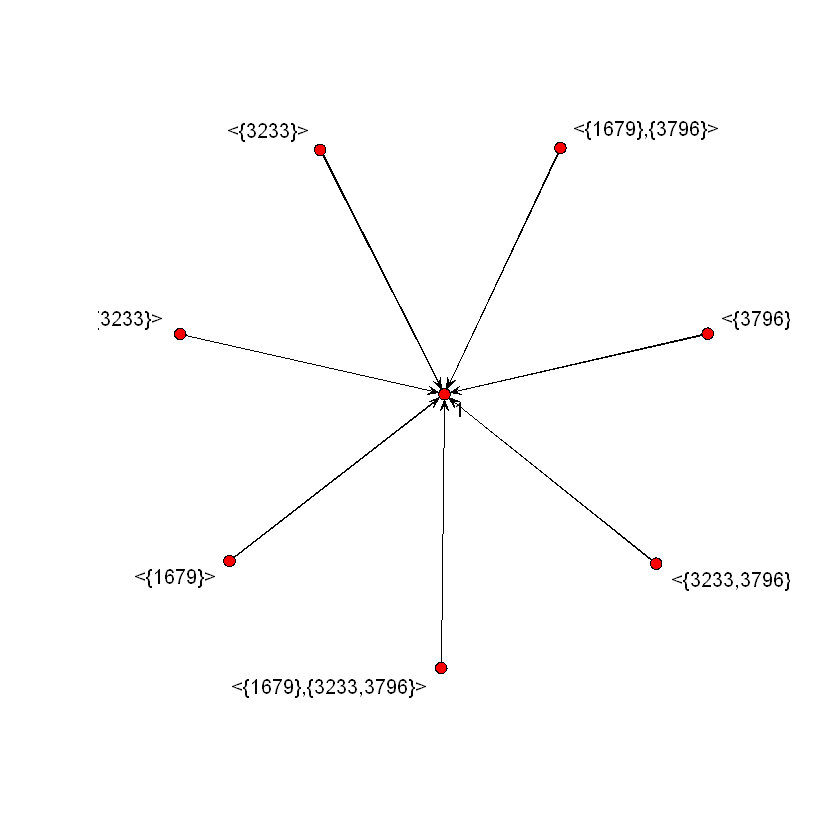

In [179]:
voo_Graph<-network(df)
plot(voo_Graph, usearrows=TRUE, displaylabels=TRUE)